<!-- ---
title: "GTO Derivation: Calculus of Variations"
date: "2025-12-05"
categories: [Poker]
execute:
  enabled: true
--- -->

In [1]:
from sympy import symbols, Function, diff, dsolve, solve, simplify, Eq, init_printing
init_printing() # 讓公式輸出變漂亮

# 定義變數
x = symbols('x')
# 定義函數 (假設這是你的邊界策略函數)
f = Function('f')(x)
g = Function('g')(x)

print("SymPy Engine Started. Ready for GTO calculations.")

SymPy Engine Started. Ready for GTO calculations.


In [4]:
from sympy import symbols, Function, Integral, Piecewise, simplify, expand, collect, init_printing

# 1. 讓輸出變漂亮
init_printing()

# 2. 定義變數 (Refactor: t -> y)
# x: Player A 的手牌 (0~1)
# y: Player B 的手牌 (0~1)
P, B = symbols('P B', positive=True)
x, y = symbols('x y', real=True)

# 3. 定義策略函數
# a(x): Player A 在拿到 x 時 Bet 的機率
# b(y): Player B 在拿到 y 時 Call 的機率
a = Function('a')(x)
b = Function('b')(y)

# 4. 指示函數 (Indicator Functions)
# 現在比較 x 和 y
I_x_gt_y = Piecewise((1, x > y), (0, True)) 
I_x_lt_y = Piecewise((1, x < y), (0, True)) 

# --- 根據筆記構建 Payoff ---

# 情境 1: A Check
# (1-a(x)) * (P if x>y else 0)
payoff_check = (1 - a) * (P * I_x_gt_y)

# 情境 2: A Bet
# 2a: B Fold -> a(x) * (1-b(y)) * P
payoff_bet_fold = a * (1 - b) * P

# 2b: B Call -> a(x) * b(y) * ( (P+B) if x>y else -B )
payoff_bet_call = a * b * ( (P + B) * I_x_gt_y - B * I_x_lt_y )

# 5. 總 Payoff Integrand
total_payoff_integrand = payoff_check + payoff_bet_fold + payoff_bet_call

# 建立積分表達式 J
J = Integral(total_payoff_integrand, (y, 0, 1), (x, 0, 1))

print("--- 原始積分內的表達式 (Integrand) ---")
# 這裡我們只顯示被積分的函數，比較好看結構
display(total_payoff_integrand)

# 6. 整理公式：針對 b(y) 分組
integrand_grouped_by_b = collect(expand(total_payoff_integrand), b)

print("\n--- 整理後：針對 b(y) 分組 ---")
# 這樣你可以清楚看到 b(t) * coefficient 的形式
display(integrand_grouped_by_b)

--- 原始積分內的表達式 (Integrand) ---


             ⎛⎧1  for x > y⎞                       ⎛    ⎛⎧1  for x < y⎞        ↪
P⋅(1 - a(x))⋅⎜⎨            ⎟ + P⋅(1 - b(y))⋅a(x) + ⎜- B⋅⎜⎨            ⎟ + (B + ↪
             ⎝⎩0  otherwise⎠                       ⎝    ⎝⎩0  otherwise⎠        ↪

↪     ⎛⎧1  for x > y⎞⎞          
↪  P)⋅⎜⎨            ⎟⎟⋅a(x)⋅b(y)
↪     ⎝⎩0  otherwise⎠⎠          


--- 整理後：針對 b(y) 分組 ---


    ⎛⎧1  for x > y⎞          ⎛⎧1  for x > y⎞            ⎛  ⎛⎧1  for x > y⎞     ↪
- P⋅⎜⎨            ⎟⋅a(x) + P⋅⎜⎨            ⎟ + P⋅a(x) + ⎜B⋅⎜⎨            ⎟⋅a(x ↪
    ⎝⎩0  otherwise⎠          ⎝⎩0  otherwise⎠            ⎝  ⎝⎩0  otherwise⎠     ↪

↪       ⎛⎧1  for x < y⎞          ⎛⎧1  for x > y⎞              ⎞     
↪ ) - B⋅⎜⎨            ⎟⋅a(x) + P⋅⎜⎨            ⎟⋅a(x) - P⋅a(x)⎟⋅b(y)
↪       ⎝⎩0  otherwise⎠          ⎝⎩0  otherwise⎠              ⎠     

In [11]:
from sympy import diff, integrate, simplify
from sympy import refine, Q

# 抓出 b(y) 的係數 (這就是我們變分法要 minimize 的核心部分)
# coeff(b) 會回傳 b(y) 前面的那一坨東西
coeff_of_b = expand(total_payoff_integrand).coeff(b)

print("\n--- b(y) 的係數項 (尚未對 x 積分) ---")
display(coeff_of_b)

# 定義 g(y) = 對係數項積分 dx
# 這是你筆記裡那個 "先固定 a(x)，求 b(y) 使其最小" 的目標函數 g(y)
g_y = Integral(coeff_of_b, (x, 0, 1))

print("\n--- g(y) 的積分形式 ---")
display(g_y)
# 我們已經有了 g_y (這是一個 Integral 物件)



--- b(y) 的係數項 (尚未對 x 積分) ---


  ⎛⎧1  for x > y⎞          ⎛⎧1  for x < y⎞          ⎛⎧1  for x > y⎞            ↪
B⋅⎜⎨            ⎟⋅a(x) - B⋅⎜⎨            ⎟⋅a(x) + P⋅⎜⎨            ⎟⋅a(x) - P⋅a ↪
  ⎝⎩0  otherwise⎠          ⎝⎩0  otherwise⎠          ⎝⎩0  otherwise⎠            ↪

↪    
↪ (x)
↪    


--- g(y) 的積分形式 ---


1                                        
⌠                                        
⎮ ⎧       0          for x > y ∧ x < y   
⎮ ⎪                                      
⎮ ⎪     B⋅a(x)           for x > y       
⎮ ⎨                                    dx
⎮ ⎪-B⋅a(x) - P⋅a(x)      for x < y       
⎮ ⎪                                      
⎮ ⎩    -P⋅a(x)           otherwise       
⌡                                        
0                                        

--- 告訴它 0 <= y <= 1 之後的清爽版 (g(y)) ---


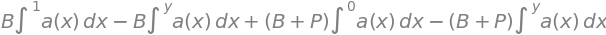


--- 最終微分結果 g'(y) ---


In [13]:
from sympy import refine
from sympy import Min, Max

# 1. 先用 doit() 強制把積分積出來
g_y_evaluated = g_y.doit()

# 2. 告訴 SymPy y 在 0 到 1 之間
# 使用標準的邏輯運算符 & (And)
# g_y_clean = refine(g_y_evaluated, (y >= 0) & (y <= 1))
g_y_clean = g_y_evaluated.replace(Min(1, Max(0, y)), y) \
                         .replace(Max(0, Min(1, y)), y) \
                         .subs({Max(0, y): y, Min(1, y): y})

print("--- 告訴它 0 <= y <= 1 之後的清爽版 (g(y)) ---")
display(g_y_clean)

# 3. 再對這個清爽版微分
g_prime = simplify(diff(g_y_clean, y))

print("\n--- 最終微分結果 g'(y) ---")
display(g_prime)